In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
sns.set()

# Import data and remove useless columns 

## Import data

In [53]:
neet_rate_altogether = pd.read_csv('./data/education_system/NEET_men_women_altogether.csv')
# neet_rate_separate = pd.read_csv('./data/education_system/NEET_men_women_separately.csv')
years_schooling = pd.read_csv('./data/education_system/mean-years-of-schooling-world.csv')
avg_class_size = pd.read_csv('./data/education_system/Avg_class_size_primary_education.csv')
student_teacher_ratio = pd.read_csv('./data/education_system/student_teacher_ratio.csv')
# vets = pd.read_csv('./data/education_system/share_of_VETs_from_2013_2018.csv')
spendings_educ = pd.read_csv('./data/education_system/spendings_in_education.csv')
education_level_and_parents = pd.read_csv('./data/education_system/education_level_depending_on_those_of_the_parents_2012_2015.csv')

**NEET rate**: data is available for oecd countries between 1997 and 2019.

**Years schooling**: data is available for oecd countries between 1870 and 2017.

**Average class size**: data is available for oecd countries between 2013 and 2018, and the data is separated in primary education (l1) and lower secondary education (l2) so we can make 2 different variables for that indicator.

**Student-Teacher ratio**: data is available for oecd countries between 2013 and 2018, and is also separated in l1 and l2, but there are also other level of education (early childhood education (l0), upper secondary education (l3) and total tertiary education (l5-l8)). Same as above we can use several variables, one for each level of education.

**Public spendings on education**: data is available for oecd countries between 1995 and 2017, but not for every year before 2008. Same as above, it is separated between l1, l2, l3, l4 (post-secondary non-tertiary education) and l5t8. We can use several variables, one for each level of education.

**Education level depending on that of the parents**:

## Dictionary with the country code of all OECD countries

In [54]:
oecd_countries = {'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'CAN': 'Canada', 'CHL': 'Chile', 'COL': 'Colombia', 'CZE': 'Czech Republic', 'DNK': 'Denmark', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'DEU': 'Germany', 'GRC': 'Greece', 'HUN': 'Hungary', 'ISL': 'Iceland', 'IRL': 'Ireland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'Korea', 'LVA': 'Latvia', 'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NZL': 'New Zealand', 'NOR': 'Norway', 'POL': 'Poland', 'PRT': 'Portugal', 'SVK': 'Slovakia', 'SVN': 'Slovenia', 'ESP': 'Spain', 'SWE': 'Sweden', 'CHE': 'Switzerland', 'TUR': 'Turkey', 'GBR': 'United Kingdom', 'USA': 'United States'}

## Preparation of the data sets

### Removal of unnecessary columns and countries

#### NEET rate

In [55]:
neet_rate_altogether_croped = neet_rate_altogether.drop(['INDICATOR', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)
neet_rate_altogether_oecd = pd.DataFrame(columns=neet_rate_altogether_croped.columns)
for code in oecd_countries.keys():
    neet_rate_altogether_oecd = neet_rate_altogether_oecd.append(neet_rate_altogether_croped[neet_rate_altogether_croped['LOCATION']==code], ignore_index=True)

In [96]:
# Missing countries for all years, but sometimes a country do not have a value for each year
missing_countries_neet = []
for code in oecd_countries.keys():
    if code not in neet_rate_altogether_oecd.LOCATION.values:
        missing_countries_neet.append(oecd_countries[code])
print('Missing countries for the NEET rate feature:', missing_countries_neet)

Missing countries for the NEET rate feature: ['Korea']


#### Average years of schooling

In [56]:
years_schooling_croped = years_schooling.drop('Entity', axis=1)
years_schooling_croped = years_schooling_croped.rename(columns={'Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))':'Average Total Years of Schooling for Adult Population'})
years_schooling_oecd = pd.DataFrame(columns=years_schooling_croped.columns)
for code in oecd_countries.keys():
    years_schooling_oecd = years_schooling_oecd.append(years_schooling_croped[years_schooling_croped['Code'] == code], ignore_index=True)

In [100]:
# Missing countries for all years, but sometimes a country do not have a value for each year
missing_countries_years_schooling = []
for code in oecd_countries.keys():
    if code not in years_schooling_oecd.Code.values:
        missing_countries_years_schooling.append(oecd_countries[code])
print('Missing countries for the average years of schooling feature:', missing_countries_years_schooling)

Missing countries for the average years of schooling feature: []


#### Average class size

In [57]:
avg_class_size_croped = avg_class_size.drop(['Country', 'Year', 'Unit Code', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'], axis=1)
avg_class_size_croped = avg_class_size_croped.drop(avg_class_size_croped[avg_class_size_croped.INDICATOR == 'PERS_AVGCLASS_BASE_2005'].index, axis=0)
avg_class_size_oecd = pd.DataFrame(columns=avg_class_size_croped.columns)
for code in oecd_countries.keys():
    avg_class_size_oecd = avg_class_size_oecd.append(avg_class_size_croped[avg_class_size_croped.COUNTRY == code], ignore_index=True)

In [58]:
avg_class_size_oecd_general = avg_class_size_oecd[(avg_class_size_oecd.INDICATOR == 'PERS_AVG_CLASS') & (avg_class_size_oecd.REF_SECTOR == 'INST_T')]

In [59]:
avg_class_size_oecd_general_l1 = avg_class_size_oecd_general[avg_class_size_oecd_general.ISC11_LEVEL_CAT == 'L1']
avg_class_size_oecd_general_l2 = avg_class_size_oecd_general[avg_class_size_oecd_general.ISC11_LEVEL_CAT == 'L2']

In [60]:
avg_class_size_oecd_general_l1 = avg_class_size_oecd_general_l1[['COUNTRY', 'Value']].reset_index(drop=True)
avg_class_size_oecd_general_l2 = avg_class_size_oecd_general_l2[['COUNTRY', 'Value']].reset_index(drop=True)

In [103]:
# Missing countries for all years, but sometimes a country do not have a value for each year
missing_countries_class_size = []
for code in oecd_countries.keys():
    if code not in avg_class_size_oecd_general.COUNTRY.values:
        missing_countries_class_size.append(oecd_countries[code])
print('Missing countries for the average class size feature:', missing_countries_class_size)

Missing countries for the average class size feature: ['United States']


#### Student Teacher Ratio

In [61]:
student_teacher_ratio_croped = student_teacher_ratio[['COUNTRY','ISC11_LEVEL_CAT','YEAR','Value']]
student_teacher_ratio_oecd = pd.DataFrame(columns = student_teacher_ratio_croped.columns)
for code in oecd_countries.keys():
    student_teacher_ratio_oecd = student_teacher_ratio_oecd.append(student_teacher_ratio_croped[student_teacher_ratio_croped['COUNTRY']==code], ignore_index=True)

In [62]:
student_teacher_ratio_oecd_2015 = student_teacher_ratio_oecd[student_teacher_ratio_oecd['YEAR']==2015]
student_teacher_ratio_oecd_2017 = student_teacher_ratio_oecd[student_teacher_ratio_oecd['YEAR']==2017]

student_teacher_ratio_oecd_l0 = student_teacher_ratio_oecd[student_teacher_ratio_oecd.ISC11_LEVEL_CAT == 'L0']
student_teacher_ratio_oecd_l1 = student_teacher_ratio_oecd[student_teacher_ratio_oecd.ISC11_LEVEL_CAT == 'L1']
student_teacher_ratio_oecd_l2 = student_teacher_ratio_oecd[student_teacher_ratio_oecd.ISC11_LEVEL_CAT == 'L2']
student_teacher_ratio_oecd_l3 = student_teacher_ratio_oecd[student_teacher_ratio_oecd.ISC11_LEVEL_CAT == 'L3']
student_teacher_ratio_oecd_l5t8 = student_teacher_ratio_oecd[student_teacher_ratio_oecd.ISC11_LEVEL_CAT == 'L5T8']
student_teacher_ratio_oecd_2015_l2 = student_teacher_ratio_oecd_2015[student_teacher_ratio_oecd_2015.ISC11_LEVEL_CAT == 'L2']
student_teacher_ratio_oecd_2015_l1 = student_teacher_ratio_oecd_2015[student_teacher_ratio_oecd_2015.ISC11_LEVEL_CAT == 'L1']
student_teacher_ratio_oecd_2017_l1 = student_teacher_ratio_oecd_2017[student_teacher_ratio_oecd_2017.ISC11_LEVEL_CAT == 'L1']

student_teacher_ratio_oecd_l0 = student_teacher_ratio_oecd_l0[['COUNTRY', 'Value']].reset_index(drop=True)
student_teacher_ratio_oecd_l1 = student_teacher_ratio_oecd_l1[['COUNTRY', 'Value']].reset_index(drop=True)
student_teacher_ratio_oecd_l2 = student_teacher_ratio_oecd_l2[['COUNTRY', 'Value']].reset_index(drop=True)
student_teacher_ratio_oecd_l3 = student_teacher_ratio_oecd_l3[['COUNTRY', 'Value']].reset_index(drop=True)
student_teacher_ratio_oecd_l5t8 = student_teacher_ratio_oecd_l5t8[['COUNTRY', 'Value']].reset_index(drop=True)
student_teacher_ratio_oecd_2015_l1 = student_teacher_ratio_oecd_2015_l1[['COUNTRY', 'Value']].reset_index(drop=True)
student_teacher_ratio_oecd_2015_l2 = student_teacher_ratio_oecd_2015_l2[['COUNTRY', 'Value']].reset_index(drop=True)
student_teacher_ratio_oecd_2017_l1 = student_teacher_ratio_oecd_2017_l1[['COUNTRY', 'Value']].reset_index(drop=True)

In [105]:
# Missing countries for all years, but sometimes a country do not have a value for each year
missing_countries_str = []
for code in oecd_countries.keys():
    if code not in student_teacher_ratio_oecd.COUNTRY.values:
        missing_countries_str.append(oecd_countries[code])
print('Missing countries for the average class size feature:', missing_countries_str)

Missing countries for the average class size feature: []


#### Spendings on education

In [63]:
spendings_educ_croped = spendings_educ[['COUNTRY','ISC11','REF_SECTOR','EXPENDITURE_TYPE','YEAR','Value']]
spendings_educ_oecd = pd.DataFrame(columns=spendings_educ_croped.columns)
for code in oecd_countries.keys():
    spendings_educ_oecd = spendings_educ_oecd.append(spendings_educ_croped[spendings_educ_croped.COUNTRY == code], ignore_index=True)

spendings_educ_oecd = spendings_educ_oecd[spendings_educ_oecd.EXPENDITURE_TYPE == 'T']
spendings_educ_oecd = spendings_educ_oecd.drop(['REF_SECTOR'],axis=1)

In [81]:
spendings_educ_oecd_l1 = spendings_educ_oecd[spendings_educ_oecd.ISC11 == 'L1']
spendings_educ_oecd_l2 = spendings_educ_oecd[spendings_educ_oecd.ISC11 == 'L2']
spendings_educ_oecd_l3 = spendings_educ_oecd[spendings_educ_oecd.ISC11 == 'L3']
spendings_educ_oecd_l4 = spendings_educ_oecd[spendings_educ_oecd.ISC11 == 'L4']
spendings_educ_oecd_l5t8 = spendings_educ_oecd[spendings_educ_oecd.ISC11 == 'L5T8']

spendings_educ_oecd_2015 = spendings_educ_oecd[spendings_educ_oecd.YEAR == 2015]

spendings_educ_oecd_2015_l1 = spendings_educ_oecd_2015[spendings_educ_oecd_2015.ISC11 == 'L1']
spendings_educ_oecd_2015_l2 = spendings_educ_oecd_2015[spendings_educ_oecd_2015.ISC11 == 'L2']

spendings_educ_oecd_l1 = spendings_educ_oecd_l1[['COUNTRY', 'Value']].reset_index(drop=True)
spendings_educ_oecd_l2 = spendings_educ_oecd_l2[['COUNTRY', 'Value']].reset_index(drop=True)
spendings_educ_oecd_l3 = spendings_educ_oecd_l3[['COUNTRY', 'Value']].reset_index(drop=True)
spendings_educ_oecd_l4 = spendings_educ_oecd_l4[['COUNTRY', 'Value']].reset_index(drop=True)
spendings_educ_oecd_l5t8 = spendings_educ_oecd_l5t8[['COUNTRY', 'Value']].reset_index(drop=True)

spendings_educ_oecd_2015_l1 = spendings_educ_oecd_2015_l1[['COUNTRY', 'Value']].reset_index(drop=True)
spendings_educ_oecd_2015_l2 = spendings_educ_oecd_2015_l2[['COUNTRY', 'Value']].reset_index(drop=True)

In [107]:
# Missing countries for all years, but sometimes a country do not have a value for each year
missing_countries_spendings = []
for code in oecd_countries.keys():
    if code not in spendings_educ_oecd.COUNTRY.values:
        missing_countries_spendings.append(oecd_countries[code])
print('Missing countries for the average class size feature:', missing_countries_spendings)

Missing countries for the average class size feature: []


### Sorting of data by date

In [65]:
years_schooling_oecd_2015 = years_schooling_oecd[years_schooling_oecd.Year == 2015]
years_schooling_oecd_2015 = years_schooling_oecd_2015.drop('Year', axis=1)
years_schooling_oecd_2015.reset_index(inplace=True)

# Overall descriptive statistics

## Years of schooling

In [66]:
years_schooling_oecd_2015['Average Total Years of Schooling for Adult Population'].describe()

count    37.000000
mean     11.816216
std       1.501391
min       7.800000
25%      11.700000
50%      12.300000
75%      12.700000
max      14.100000
Name: Average Total Years of Schooling for Adult Population, dtype: float64

Text(0.5, 0, 'Country code')

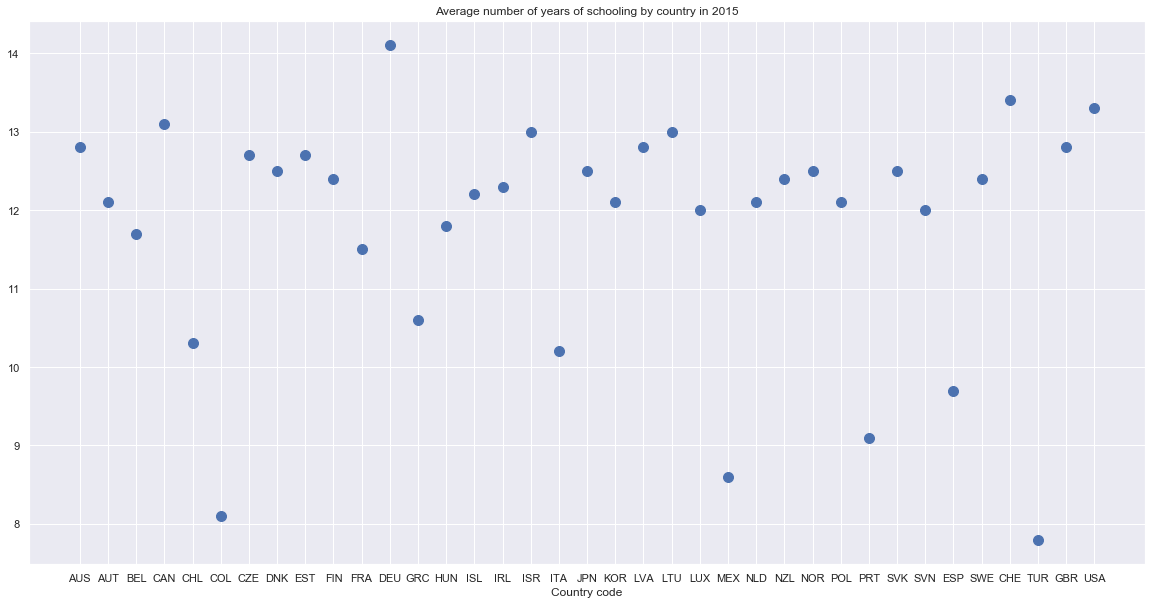

In [67]:
plt.figure(figsize=(20,10))
plt.plot(years_schooling_oecd_2015['Code'], years_schooling_oecd_2015['Average Total Years of Schooling for Adult Population'], 'o', ms=10)
plt.title('Average number of years of schooling by country in 2015')
plt.xlabel('Country code')

Text(0, 0.5, '')

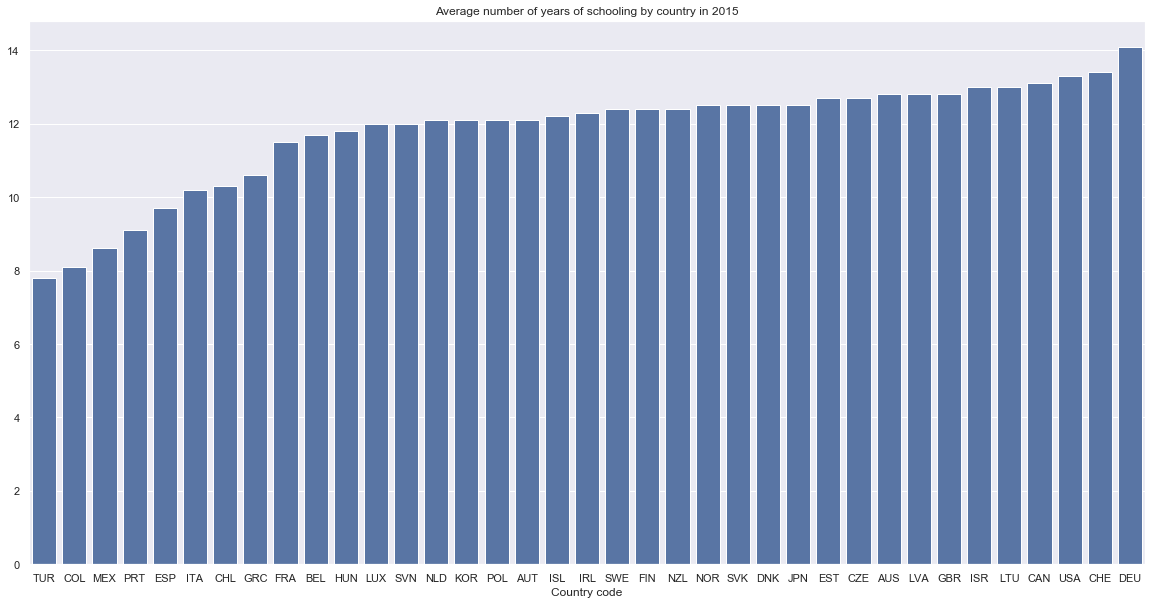

In [68]:
plt.figure(figsize=(20,10))
sns.barplot(x='Code',y='Average Total Years of Schooling for Adult Population',data=years_schooling_oecd_2015,order=years_schooling_oecd_2015.sort_values('Average Total Years of Schooling for Adult Population')["Code"],color="C0")
plt.title("Average number of years of schooling by country in 2015")
plt.xlabel('Country code')
plt.ylabel('')

## Average class size

In [69]:
avg_class_size_oecd_general_l1.Value.describe()

count    167.000000
mean      21.069210
std        3.500902
min       15.333000
25%       18.513000
50%       20.843000
75%       23.138500
max       30.814000
Name: Value, dtype: float64

Text(0.5, 0, 'Country code')

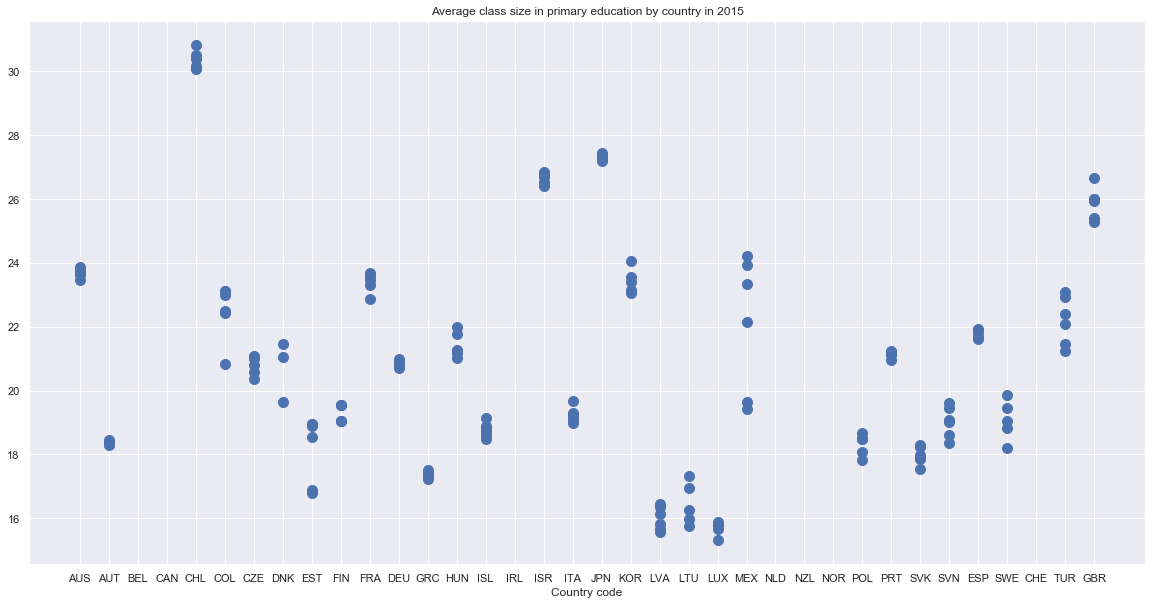

In [70]:
plt.figure(figsize=(20,10))
plt.plot(avg_class_size_oecd_general_l1['COUNTRY'], avg_class_size_oecd_general_l1['Value'], 'o', ms=10)
plt.title('Average class size in primary education by country in 2015')
plt.xlabel('Country code')

Text(0, 0.5, 'Average class size')

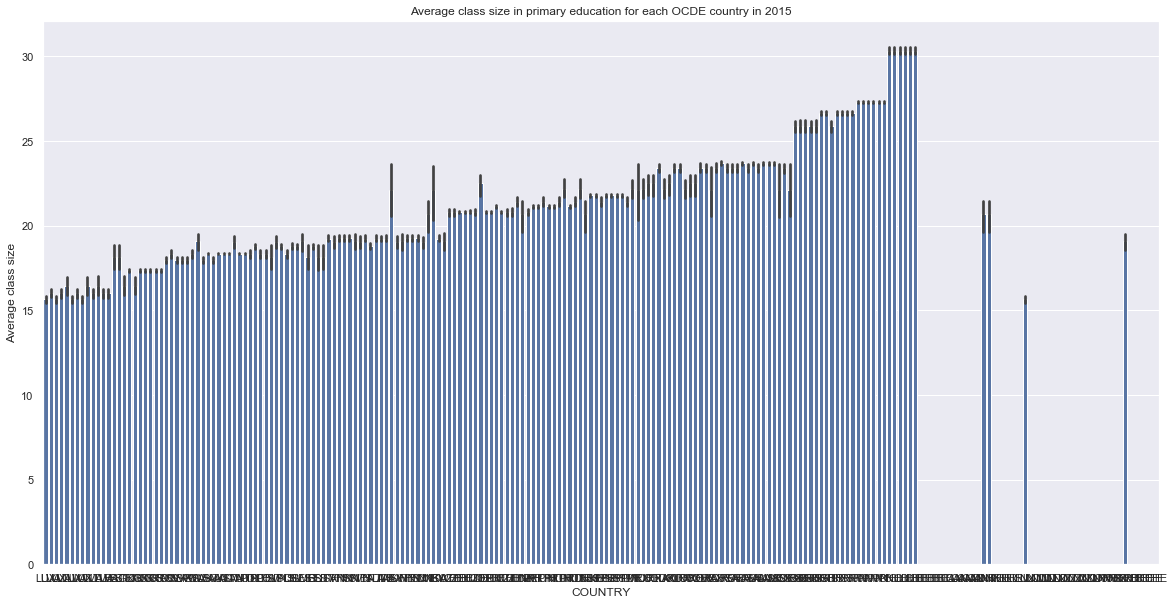

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(x='COUNTRY',y="Value",data=avg_class_size_oecd_general_l1,order=avg_class_size_oecd_general_l1.sort_values('Value')["COUNTRY"],color="C0")
plt.title("Average class size in primary education for each OCDE country in 2015")
plt.ylabel("Average class size")

In [72]:
avg_class_size_oecd_general_l2.Value.describe()

count    168.000000
mean      22.940173
std        4.252835
min       14.420000
25%       19.917500
50%       21.713500
75%       25.370250
max       32.810000
Name: Value, dtype: float64

Text(0.5, 0, 'Country code')

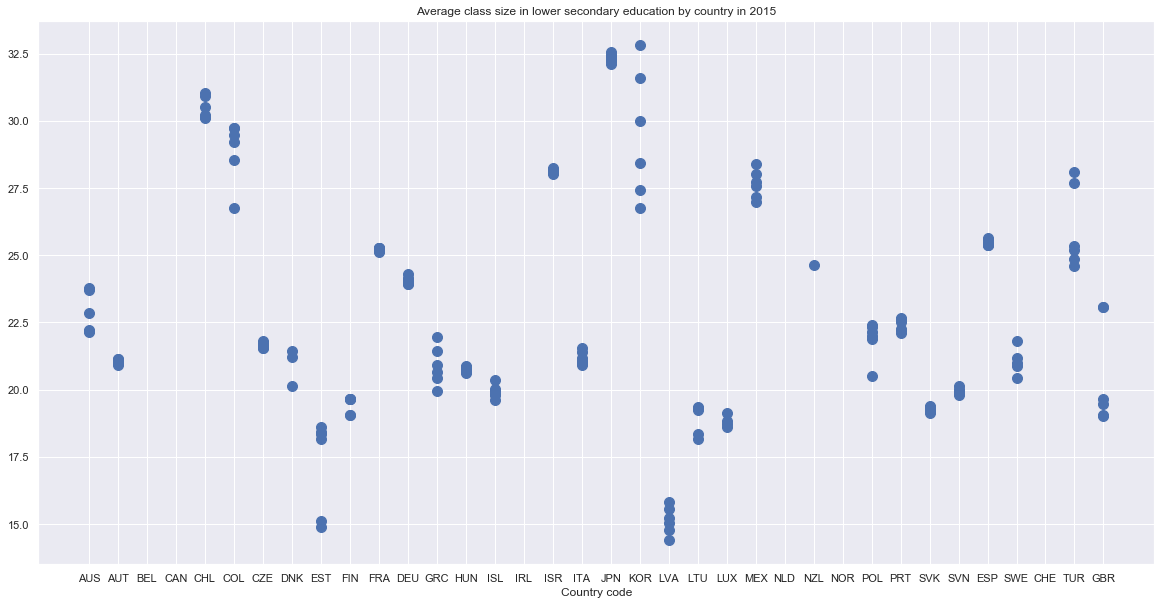

In [73]:
plt.figure(figsize=(20,10))
plt.plot(avg_class_size_oecd_general_l2['COUNTRY'], avg_class_size_oecd_general_l2['Value'], 'o', ms=10)
plt.title('Average class size in lower secondary education by country in 2015')
plt.xlabel('Country code')

Text(0, 0.5, 'Average class size')

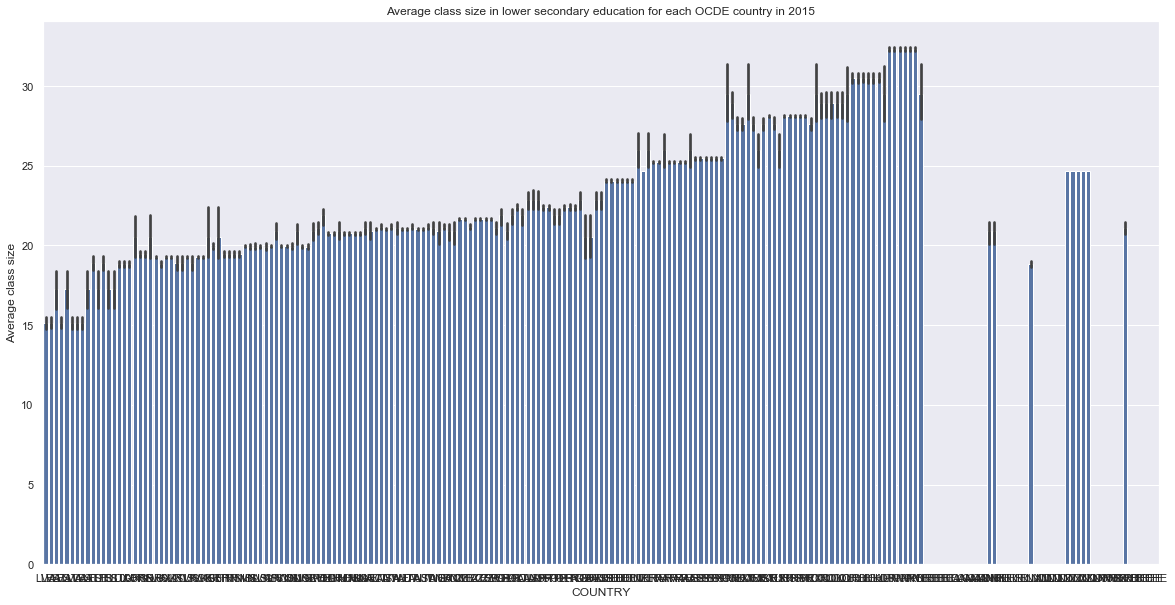

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(x='COUNTRY',y="Value",data=avg_class_size_oecd_general_l2,order=avg_class_size_oecd_general_l2.sort_values('Value')["COUNTRY"],color="C0")
plt.title("Average class size in lower secondary education for each OCDE country in 2015")
plt.ylabel("Average class size")

## Student teacher ratio

In [75]:
student_teacher_ratio_oecd_2015_l1.Value.describe()

count    33.000000
mean     15.316879
std       3.958185
min      10.256000
25%      12.357000
50%      15.433000
75%      16.978000
max      26.927000
Name: Value, dtype: float64

In [76]:
student_teacher_ratio_oecd_2015_l2.Value.describe()

count    31.000000
mean     13.221548
std       5.590547
min       7.313000
25%       9.608500
50%      11.816000
75%      14.903500
max      33.557000
Name: Value, dtype: float64

Text(0, 0.5, '')

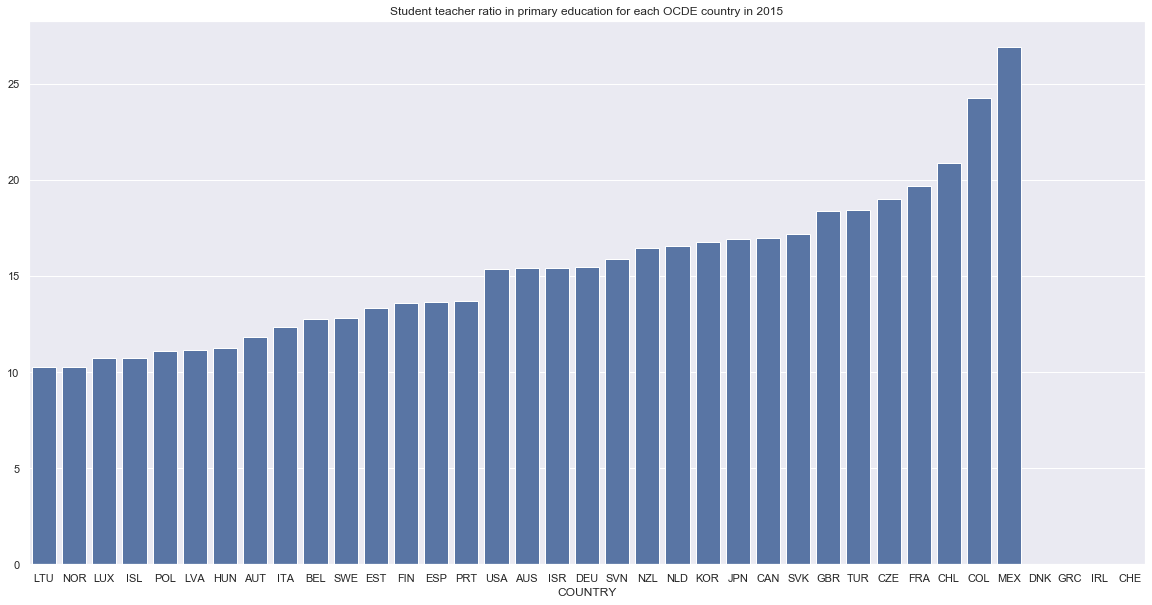

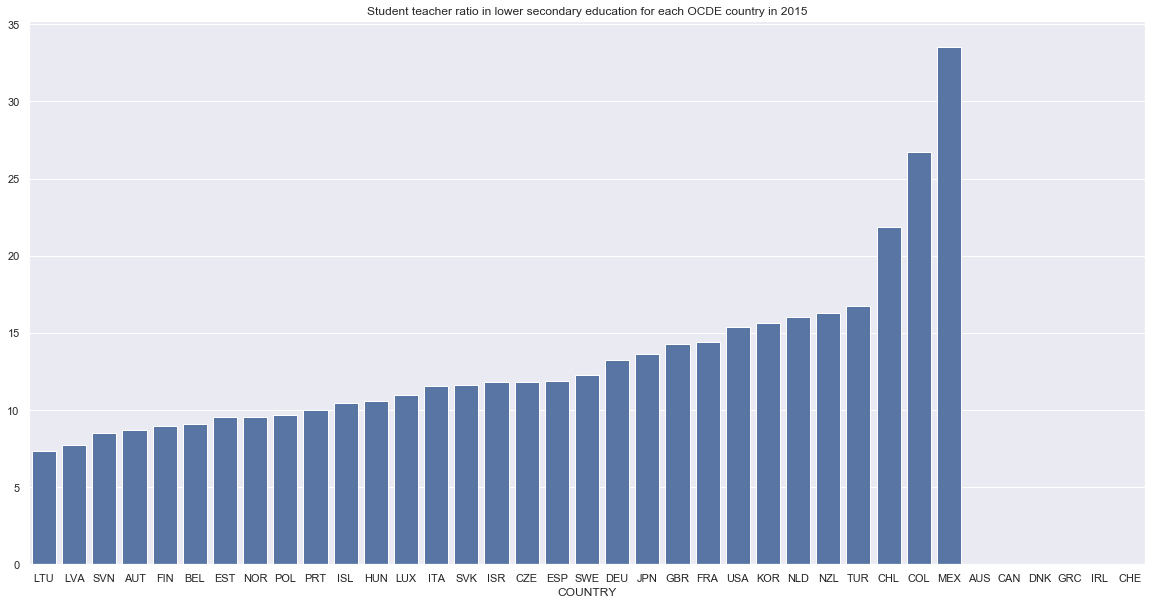

In [77]:
plt.figure(figsize=(20,10))
sns.barplot(x='COUNTRY',y="Value",data=student_teacher_ratio_oecd_2015_l1,order=student_teacher_ratio_oecd_2015_l1.sort_values('Value')["COUNTRY"],color="C0")
plt.title("Student teacher ratio in primary education for each OCDE country in 2015")
plt.ylabel('')

plt.figure(figsize=(20,10))
sns.barplot(x='COUNTRY',y="Value",data=student_teacher_ratio_oecd_2015_l2,order=student_teacher_ratio_oecd_2015_l2.sort_values('Value')["COUNTRY"],color="C0")
plt.title("Student teacher ratio in lower secondary education for each OCDE country in 2015")
plt.ylabel('')

Text(0, 0.5, '')

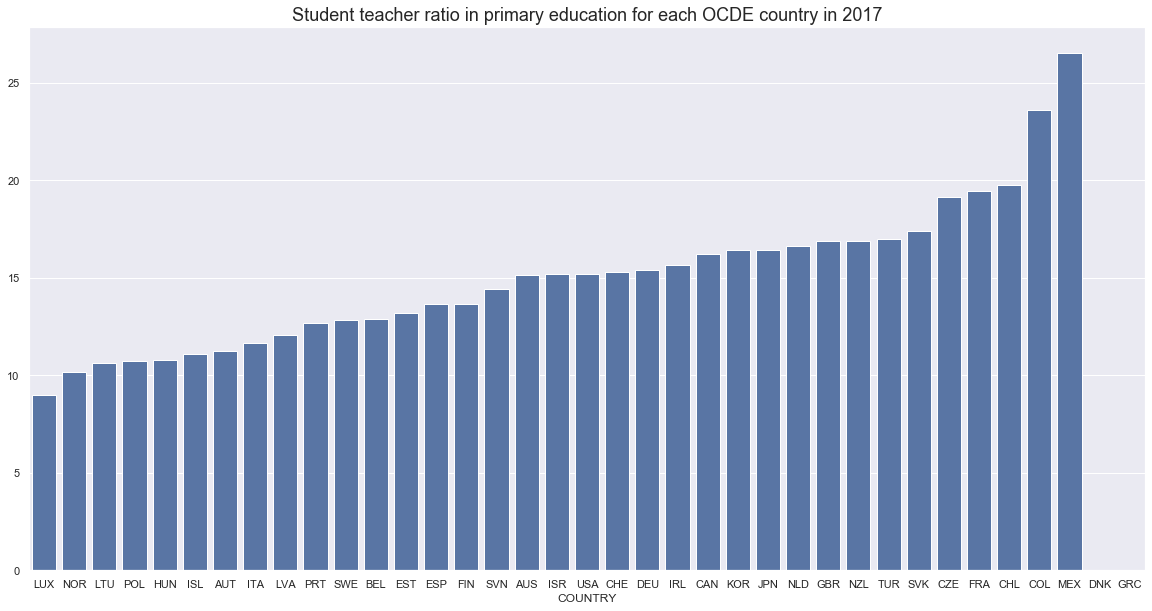

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(x='COUNTRY',y="Value",data=student_teacher_ratio_oecd_2017_l1,order=student_teacher_ratio_oecd_2017_l1.sort_values('Value')["COUNTRY"],color="C0")
plt.title("Student teacher ratio in primary education for each OCDE country in 2017", size=18)
plt.ylabel('')

## Spendings in eduction

In [ ]:
spendings_educ_oecd_2015_l1.Value.describe()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='COUNTRY',y="Value",data=spendings_educ_oecd_2015_l1, order= spendings_educ_oecd_2015_l1.sort_values('Value')["COUNTRY"],color="C0")
plt.title("Spendings for each student (USD) in primary education for each OECD country in 2015")
plt.ylabel("")

In [ ]:
spendings_educ_oecd_2015_l2.Value.describe()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='COUNTRY',y="Value",data=spendings_educ_oecd_2015_l2, order= spendings_educ_oecd_2015_l2.sort_values('Value')["COUNTRY"],color="C0")
plt.title("Spendings for each student (USD) in lower secondary education for each OECD country in 2015")
plt.ylabel("")

# World map with NEET rate

In [ ]:
world_map = os.path.join('./data/', 'world_map.json')
neet_rate_2017 = neet_rate_altogether_oecd[(neet_rate_altogether_oecd.TIME==2017) & (neet_rate_altogether_oecd.SUBJECT=='15_19')]
neet_rate_2017 = neet_rate_2017.drop(['SUBJECT', 'TIME'], axis=1)

neet_rate_2017 = neet_rate_altogether_oecd[(neet_rate_altogether_oecd.TIME==2017) & (neet_rate_altogether_oecd.SUBJECT=='15_19')]
neet_rate_2017 = neet_rate_2017.drop(['SUBJECT', 'TIME'], axis=1)

In [ ]:
neet_map = folium.Map(min_zoom=1, max_zoom=3)
folium.Choropleth(
 geo_data=world_map,
 name='choropleth',
 data=neet_rate_2017,
 columns=['LOCATION', 'Value'],
 key_on='feature.properties.adm0_a3',
 line_opacity=0.4,
 nan_fill_color="Black",
 nan_fill_opacity=0.2,
 highlight=True,
 legend_name='NEET rate for 15-19 years old in OECD countries in 2015 (in %)',
).add_to(neet_map)

In [ ]:
neet_map